In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# more "No" than "Yes" in Churn column
# type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
# Cross-validation is a model evaluation technique in machine learning that assesses how well a model generalizes to unseen data 
# by partitioning the dataset into multiple subsets, 
# training the model on some and testing on the remaining, and repeating this process to get a more robust performance estimate
from sklearn.model_selection import train_test_split, cross_val_score
# tree-based models - not sensitive to outliers, no need to standardize data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv("churn_dataset.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Senior Citizen - categorical data
- tenure - # of months the user has used a service


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# Dictionary to hold unique values for each column
unique_values = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Assign unique values of each column to the dictionary
    unique_values[column] = df[column].unique().tolist()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")

Unique values in customerID: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '741

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
len(df[df['TotalCharges'] == ' '])

11

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0.0")

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(), "\n")

Value counts for customerID:
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64 

Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64 

Value counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

Value counts for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64 

Value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No pho

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Insights

1. No missing values in dataset
2. A few missing values in Total Charges column are replaced with 0
3. Class imbalance identified in target variable

In [18]:
def plot_frequency_distribution(dataframe, column):
    # Check if the column exists in the DataFrame
    if column in dataframe.columns:
        # Plotting the frequency distribution
        plt.figure(figsize=(5,3))
        sns.histplot(df[column], kde=True)
        plt.title(f'Frequency Distribution of {column}')
        
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrame.")

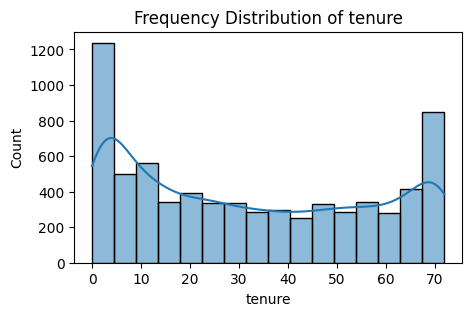

In [19]:
plot_frequency_distribution(df, "tenure")

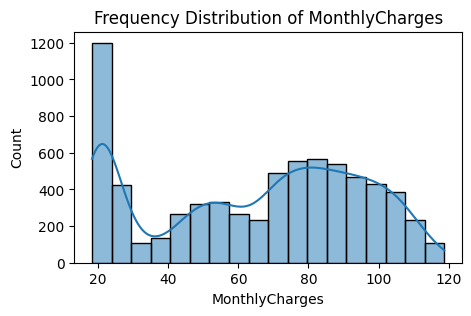

In [20]:
plot_frequency_distribution(df, "MonthlyCharges")

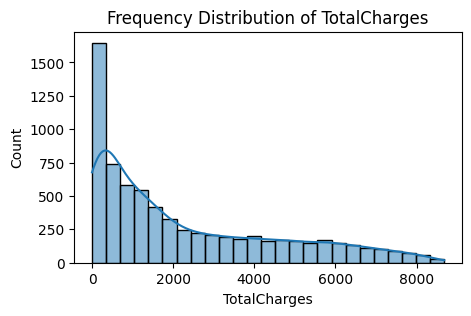

In [21]:
plot_frequency_distribution(df, "TotalCharges")

In [22]:
def plot_frequency_distribution(dataframe, column):
    # Check if the column exists in the DataFrame
    if column in dataframe.columns:
        # Plotting the boxplot for the column
        plt.figure(figsize=(5,3))  # Set the figure size
        sns.boxplot(y=dataframe[column])  # Using seaborn to create the boxplot
        plt.title(f'Distribution of {column}')  # Set the title
        plt.xlabel(column)  # Label the x-axis with the column name
        plt.grid(True)  # Enable grid for better readability
        plt.show()  # Display the plot
    else:
        print(f"Column '{column}' not found in DataFrame.")


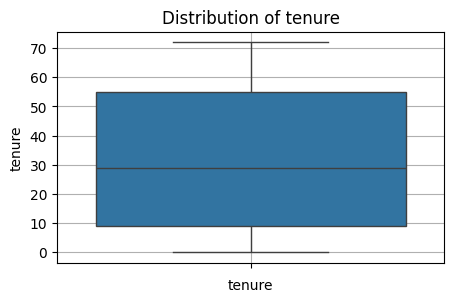

In [23]:
plot_frequency_distribution(df, "tenure")

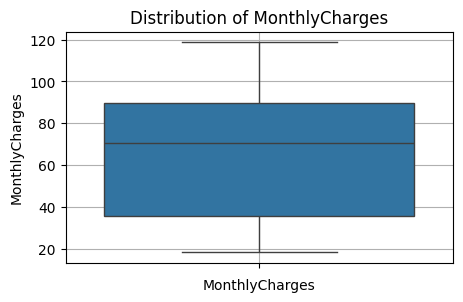

In [24]:
plot_frequency_distribution(df, "MonthlyCharges")

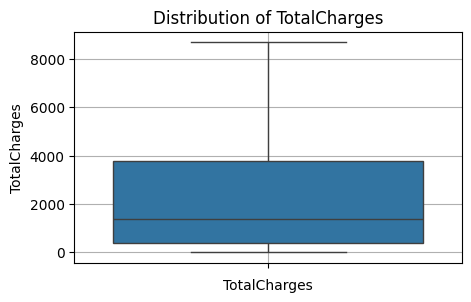

In [25]:
plot_frequency_distribution(df, "TotalCharges")

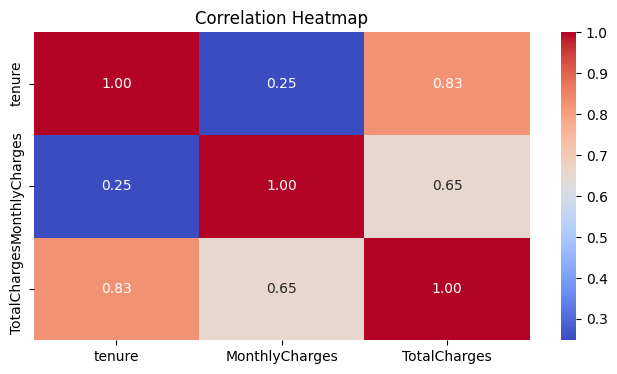

In [26]:
plt.figure(figsize=(8,4))
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()  # Correct placement of ]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Highest correlation between tenure and total charges because the longer you are in the company, the more charges you get

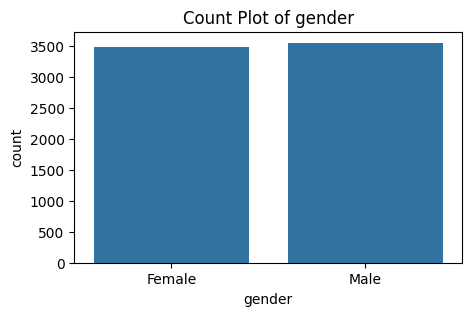

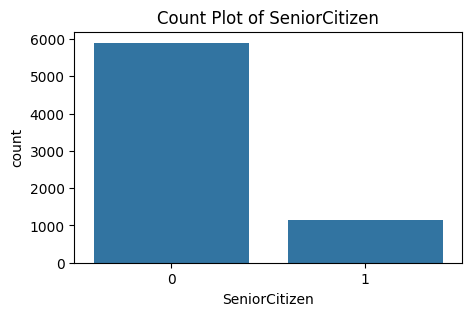

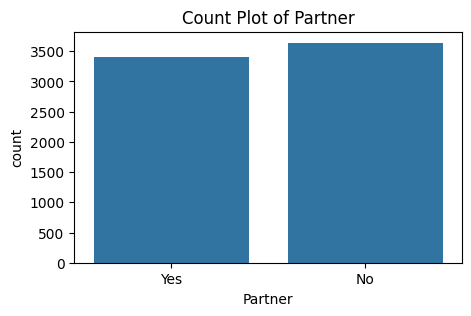

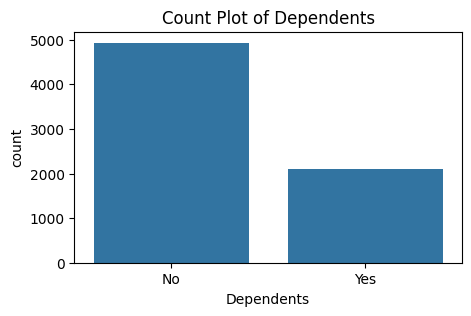

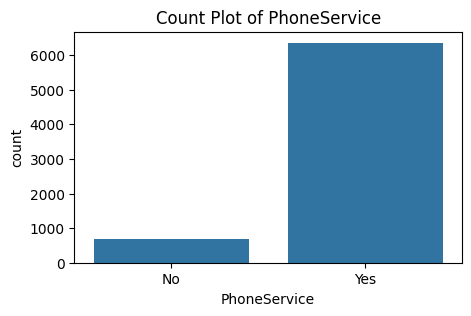

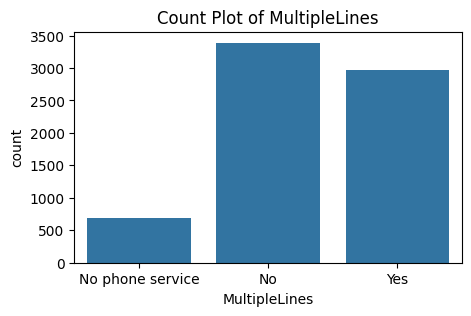

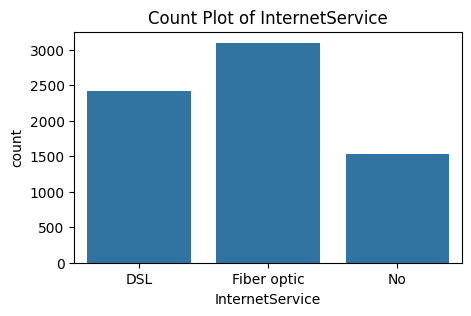

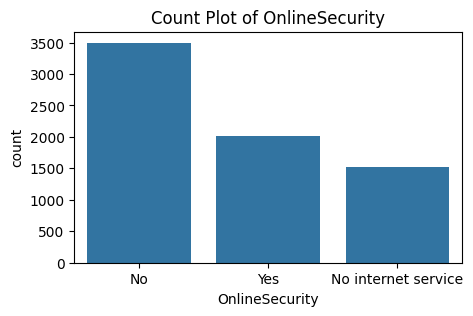

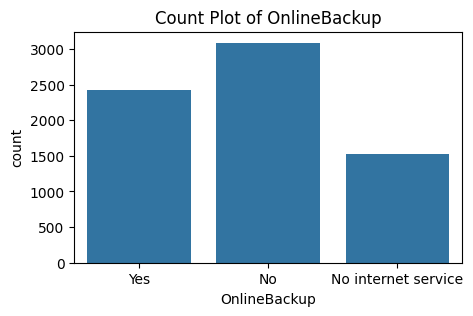

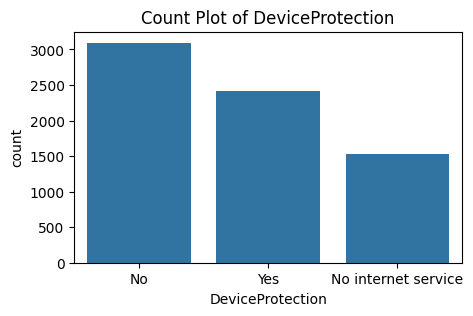

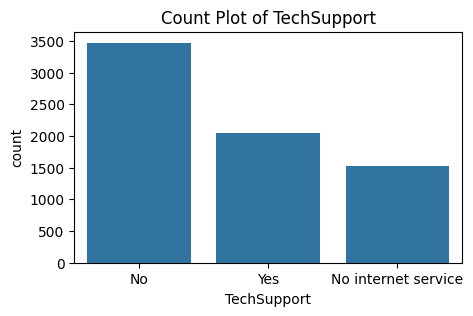

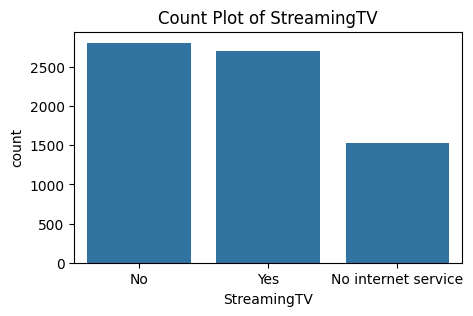

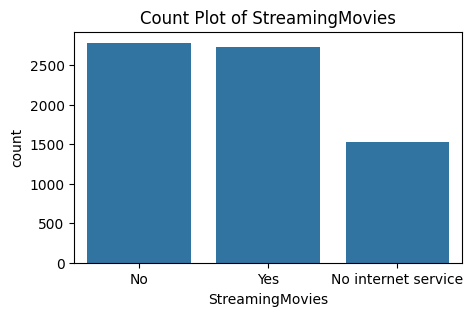

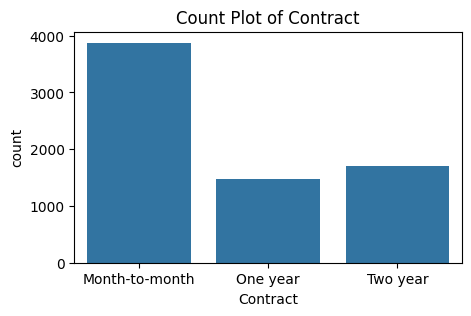

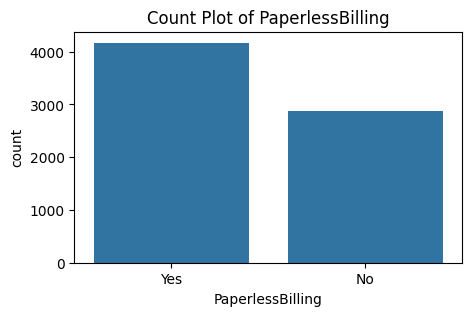

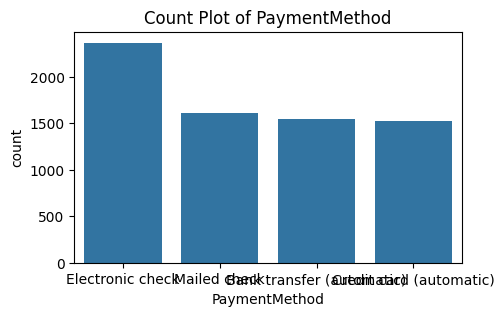

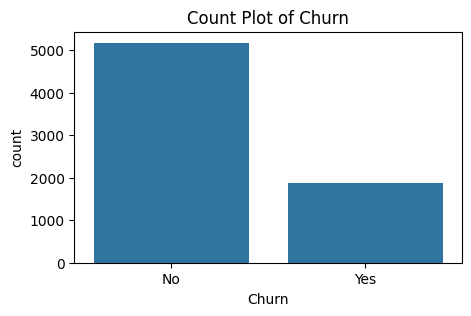

In [27]:
df = df.drop('customerID', axis=1)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
object_cols = df.select_dtypes(include="object").columns.to_list()

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

# Data Preprocessing

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Label Encoding

In [29]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

C:\Users\nguye\AppData\Local\Temp\ipykernel_22064\372009398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [31]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [32]:
object_columns = df.select_dtypes(include='object').columns

Pickle is a module in Python used for serializing and deserializing Python object structures, also known as "pickling" and "unpickling." 
- Serialization converts a Python object into a byte stream, which can be stored in a file or transmitted over a network. 
- Deserialization reconstructs the original object from the byte stream

In [33]:
encoders = {}

for column in object_columns:
    # initiate label encoder
    label_encoder = LabelEncoder()
    # transform and update the columns in df
    df[column] = label_encoder.fit_transform(df[column])
    # save this in encoder dictionary
    encoders[column] = label_encoder

# The with statement is used here to handle the file opening and closing. 
# This is a context manager that ensures the file is properly closed after its suite finishes, even if an error occurs during the process

# 'w' indicates write mode, meaning if the file already exists, it will be overwritten. If the file does not exist, it will be created
# 'b' indicates binary mode, which is necessary for writing non-text data, such as the output from pickle.dump
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [34]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [36]:
X = df.drop(columns='Churn')
y = df['Churn']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print(y_train.shape)

(5634,)


In [39]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

# SMOTE

In [40]:
smote = SMOTE(random_state=42)

In [41]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [42]:
y_train_smote.shape

(8276,)

In [43]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

# Model Training

In [44]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [45]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')
    print('.'*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
......................................................................
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
......................................................................
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
......................................................................


In [46]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [89]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='recall')
    cv_scores[model_name] = scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')
    print('.'*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
......................................................................
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.83
......................................................................
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.82
......................................................................


In [90]:
cv_scores

{'Decision Tree': array([0.56038647, 0.61185006, 0.87545345, 0.91062802, 0.91908213]),
 'Random Forest': array([0.59299517, 0.65900846, 0.96977025, 0.96980676, 0.96618357]),
 'XGBoost': array([0.54347826, 0.63361548, 0.97218863, 0.98067633, 0.97463768])}

In [94]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='precision')
    cv_scores[model_name] = scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')
    print('.'*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
......................................................................
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
......................................................................
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
......................................................................


In [95]:
cv_scores

{'Decision Tree': array([0.7388535 , 0.77846154, 0.7843987 , 0.8029819 , 0.79853095]),
 'Random Forest': array([0.81023102, 0.83975347, 0.85775401, 0.83995816, 0.85106383]),
 'XGBoost': array([0.81669691, 0.83042789, 0.85350318, 0.83196721, 0.84679958])}

In [96]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1')
    cv_scores[model_name] = scores
    print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')
    print('.'*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.77
......................................................................
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.83
......................................................................
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.82
......................................................................


In [97]:
cv_scores

{'Decision Tree': array([0.63736264, 0.68517265, 0.82742857, 0.85342388, 0.85457608]),
 'Random Forest': array([0.68479777, 0.73848238, 0.91032917, 0.90022422, 0.90497738]),
 'XGBoost': array([0.65264685, 0.71879287, 0.90898813, 0.90022173, 0.90623245])}

Random Forest gives the highest accuracy, precision, and f1 score compared to other models with default parameters

In [47]:
rfc = RandomForestClassifier(random_state=42)

In [48]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [49]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



880 correctly predicted zeroes, 215 correctly predicted ones

In [104]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

recall and precision values are less since there's no proper distribution

In [122]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [123]:
# save the trained model as a pickle file
model_data = {'model': rfc, 'features_names': X.columns.tolist()}

with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

# Load the saved model and build a predicitve system

In [124]:
# load saved model and the feature names

# Load the model directly from the file
with open('customer_churn_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

loaded_model = model_data['model']
feature_names = model_data['features_names']

In [125]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [126]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([input_data])

# load this encoders we saved from pickle file
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

# encode categorical features using the saved encoders
for column, encoder in encoders.items():
    # no fit transform bc they are already fitted to the data
    input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# would be either zero or one
print(prediction)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f'Prediction Probability: {pred_prob}')

[0]
Prediction: No Churn
Prediction Probability: [[0.83 0.17]]


83% chance is no churn, 17% is churn

In [140]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


Performance is not that good since there's a chance of overfitting and and imbalance issue

In [141]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

Recommended Next Steps
- Implement Hyperparameter Tuning
- Try Logistic Regression and Other Models
    - Perform feature scaling to train different models and see if some models perform better
- Try Downsampling and Other Oversampling Methods
- Try to Address the Overfitting Issue
- Try Stratified K-Fold Cross Validation
